In [1]:
from FCA import *

In [2]:
X = pickle.load(open('./my_data/regression_graph_neigh_1_8_prob_0.1_0.5.pkl', 'rb'))
Y_data = pickle.load(open('./my_data/regression_Y_data_neigh_1_8_prob_0.1_0.5.pkl', 'rb'))
df = pd.read_csv("./my_data/regression_graph_features.csv")

(array([  7.,  23.,  37.,  59.,  26.,  14.,  16.,   9.,  19., 290.]),
 array([0.425 , 0.4825, 0.54  , 0.5975, 0.655 , 0.7125, 0.77  , 0.8275,
        0.885 , 0.9425, 1.    ]),
 <BarContainer object of 10 artists>)

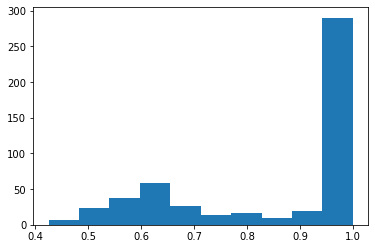

In [3]:
plt.hist(Y_data)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(df.index[pd.isnull(df).any(1)]), 
                                                    np.delete(Y_data, df.index[pd.isnull(df).any(1)]), 
                                                    test_size = 0.2)

In [5]:
# create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
 
# fit the regressor with x and y data
regressor.fit(X_train, y_train) 
predicted = regressor.predict(X_test)
import sklearn, math
mse = sklearn.metrics.mean_squared_error(y_test, predicted)
rmse = math.sqrt(mse)
print(mse)
print(rmse)
print(sklearn.metrics.r2_score(y_test, predicted))

0.0013121931250000014
0.03622420634051216
0.9572863359584645


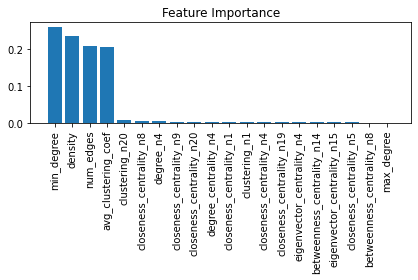

In [6]:
importances = regressor.feature_importances_

sorted_indices = np.argsort(importances)[::-1]

plt.title('Feature Importance')
plt.bar(range(20), list(importances[sorted_indices])[0:20], align='center')
plt.xticks(range(20), list(X_train.columns[sorted_indices])[0:20], rotation=90)
plt.tight_layout()
plt.show()

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X.T, 
                                                    Y_data, 
                                                    test_size = 0.2)

In [8]:
# create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
 
# fit the regressor with x and y data
regressor.fit(X_train, y_train) 
predicted = regressor.predict(X_test)
import sklearn, math
mse = sklearn.metrics.mean_squared_error(y_test, predicted)
rmse = math.sqrt(mse)
print(mse)
print(rmse)
print(sklearn.metrics.r2_score(y_test, predicted))

0.0038545581250000022
0.062085087782816274
0.8713053322176291


In [9]:
xi = 1
iter_avg = 1
beta = 0.5
iteration = 100
r = 8
SDL_BCD_class_new = SDL_BCD(X=[pd.DataFrame(X_train).to_numpy().T, np.array(y_train).reshape(-1,1).T],  # data, label
                        X_test=[pd.DataFrame(X_train).to_numpy().T, np.array(y_test).reshape(-1,1).T],
                        #X_auxiliary = None,
                        n_components=r,  # =: r = number of columns in dictionary matrices W, W'
                        # ini_loading=None,  # Initializatio for [W,W'], W1.shape = [d1, r], W2.shape = [d2, r]
                        # ini_loading=[W_true, np.hstack((np.array([[0]]), Beta_true))],
                        # ini_code = H_true,
                        xi=xi,  # weight on label reconstruction error
                        L1_reg = [0,0,0], # L1 regularizer for code H, dictionary W[0], reg param W[1]
                        L2_reg = [0,0,0], # L2 regularizer for code H, dictionary W[0], reg param W[1]
                        nonnegativity=[True,True,False], # nonnegativity constraints on code H, dictionary W[0], reg params W[1]
                        full_dim=False)

results_dict_new = SDL_BCD_class_new.fit(iter=iteration, subsample_size=None,
                                                beta = beta,
                                                search_radius_const=np.linalg.norm(X_train),
                                                update_nuance_param=False,
                                                if_compute_recons_error=False, if_validate=False)

  9%|▉         | 9/100 [00:00<00:01, 84.76it/s]

initial loading beta [[ 0.19195699  0.14388719 -0.85451103  0.56652701  0.89639039 -0.45379235
  -0.753765    0.10012322 -0.93113821]]


100%|██████████| 100/100 [00:00<00:00, 125.98it/s]


In [10]:
results_dict_new

{'xi': 1,
 'L1_reg': [0, 0, 0],
 'L2_reg': [0, 0, 0],
 'nonnegativity': [True, True, False],
 'n_components': 8,
 'loading': [array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [8.93319728e-02, 0.00000000e+00, 1.73242621e-02, ...,
          5.64731158e-02, 8.72945423e-03, 0.00000000e+00],
         [9.16870957e-03, 1.06263258e-02, 5.26954572e-02, ...,
          0.00000000e+00, 6.34704836e-03, 2.15194220e-02],
         ...,
         [6.53930218e-03, 1.01182094e-02, 5.36599105e-02, ...,
          0.00000000e+00, 7.52613613e-03, 2.25244169e-02],
         [8.79360994e-02, 0.00000000e+00, 1.69057263e-02, ...,
          5.76275425e-02, 8.16989996e-03, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          5.72602224e-09, 0.00000000e+00, 0.00000000e+00]]),
  array([[-2.43484886,  0.64354181, -0.06394736, -0.00336779,  0.07830394,
           0.06257341,  0.26492934,  0.01396883, -0.0

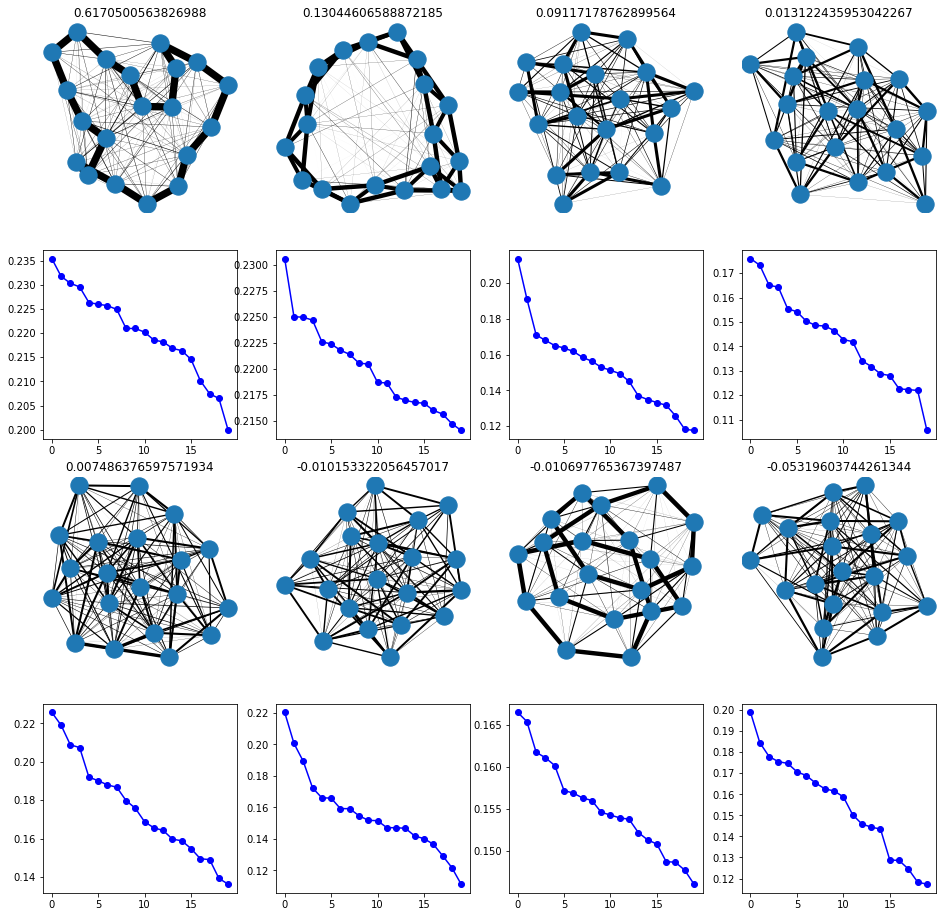

In [11]:
ncol = 4
nrow = 4
fig, axs = plt.subplots(ncols=ncol, nrows=nrow, figsize=(ncol*4, nrow*4))
sorted_indices = np.argsort(results_dict_new["loading"][1][0][1:])[::-1]
for i in range(8):
    ind = sorted_indices[i]
    df_adj = pd.DataFrame(results_dict_new["loading"][0].T[ind].reshape(20, 20))
    G = nx.Graph()
    G = nx.from_pandas_adjacency(df_adj)
    edges = G.edges()
    weights = [80*G[u][v]['weight'] for u,v in edges]
    nx.draw(G, ax=axs[(i//4)*2,i%4], width=weights)
    axs[(i//4)*2,i%4].title.set_text(str(results_dict_new["loading"][1][0][1:][sorted_indices[i]]))
    
    
    deg_seq = sorted((d for n, d in G.degree(weight='weight')), reverse=True)
    axs[(i//4)*2+1,i%4].plot(deg_seq, "b-", marker="o")